# **Project Name - Time Series Forecasting**

##### **Project Type**    - Time Series
##### **Contribution**    - Individual
##### **Author -** Prashik Dhole

# ***Let's Begin !***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/airpassenger.csv')

### Dataset First View

In [ ]:
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
data.tail(10)

,Month,#Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


### Dataset Rows & Columns count

In [ ]:
data.shape

(144, 2)

### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


###Convert it into the time series

In [ ]:
con = data['Month']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

###Plot the time series

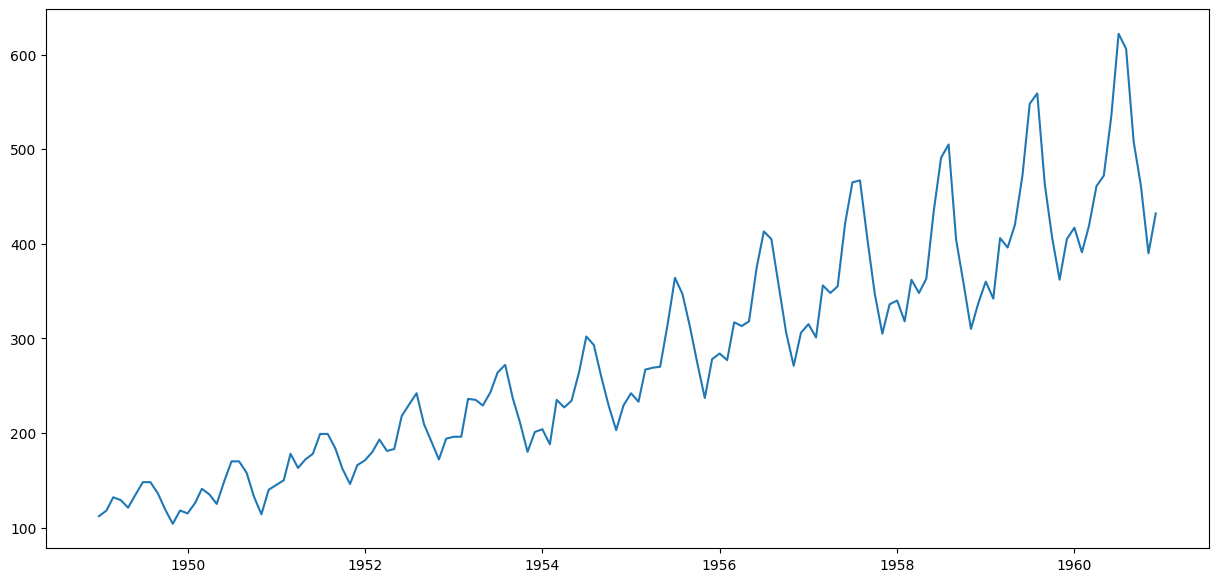

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(ts)

From visulization of  the graph we seen that the time series is **non-stationary**.



To confirm that we take a dicky-Filler test

###Dicky Filler test

In [ ]:
def test_stationarity(timeseries):
  #determining rolling statistics
  rollmean = pd.Series(timeseries).rolling(window=12).mean()
  rollstd = pd.Series(timeseries).rolling(window=12).std()

  #plot original time series
  orig = plt.plot(timeseries,color = 'blue',label = 'Original')
  mean = plt.plot(rollmean,color = 'red',label = 'Rolling Mean')
  std = plt.plot(rollstd,color = 'black',label ='Rolling Std')

  plt.legend(loc = 'best')
  plt.title('Rolling mean and standard deviation')
  plt.show()

  #perform dicky-fuller test

  print('result of dicky-fuller test')
  dftest = adfuller(timeseries,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics','P-value','#Lags used','Number of Observation used'])

  for key,value in dftest[4].items():
    dfoutput['critical value(%s)'%key]=value
  print(dfoutput)

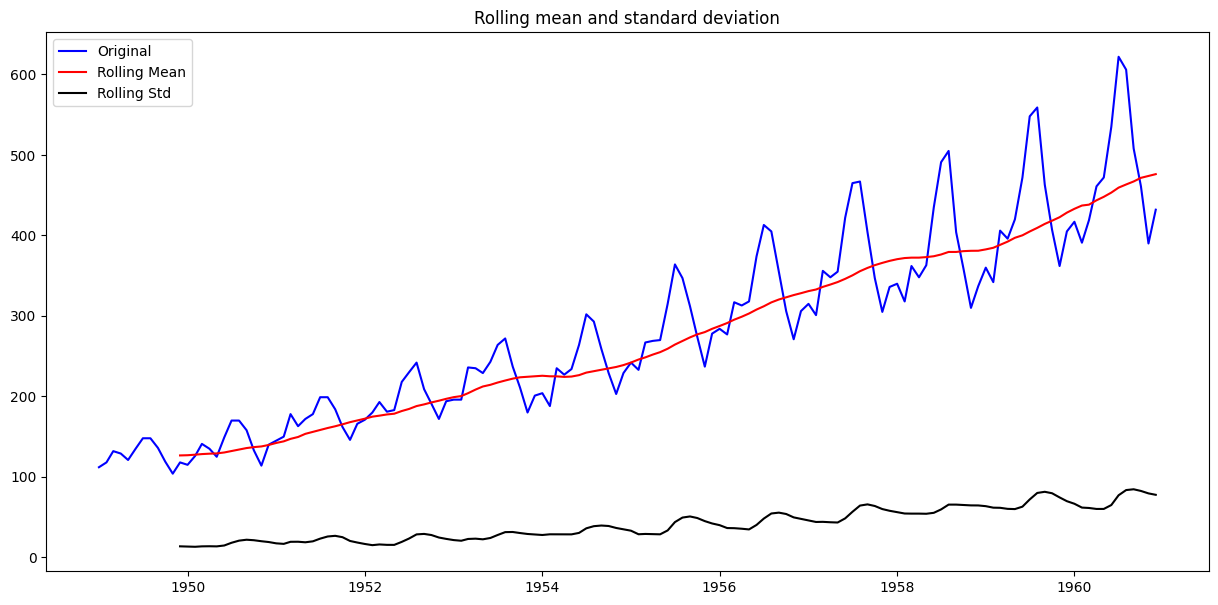

result of dicky-fuller test
Test Statistics                 0.815369
P-value                         0.991880
#Lags used                     13.000000
Number of Observation used    130.000000
critical value(1%)             -3.481682
critical value(5%)             -2.884042
critical value(10%)            -2.578770
dtype: float64


In [ ]:
plt.figure(figsize=(15,7))
test_stationarity(ts)

The above Time Series is  non stationary because
mean is increasing even though the std is small
**test_stat > critical value**

###Make time series stationary

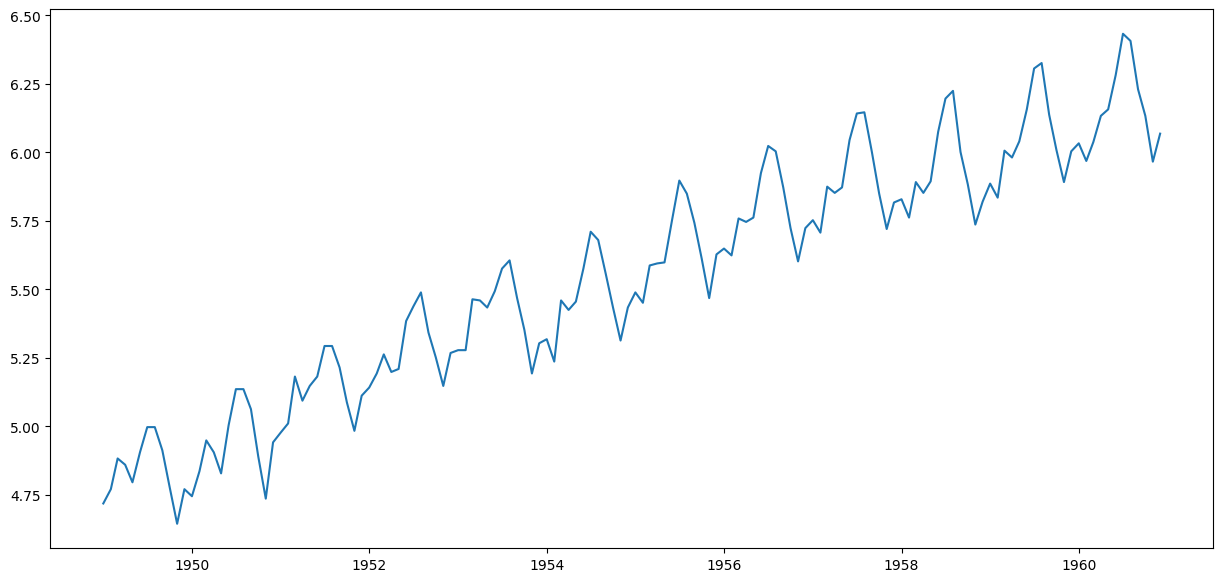

In [ ]:
ts_log = np.log(ts)
plt.figure(figsize=(15,7))
plt.plot(ts_log)

###Calculate moving average

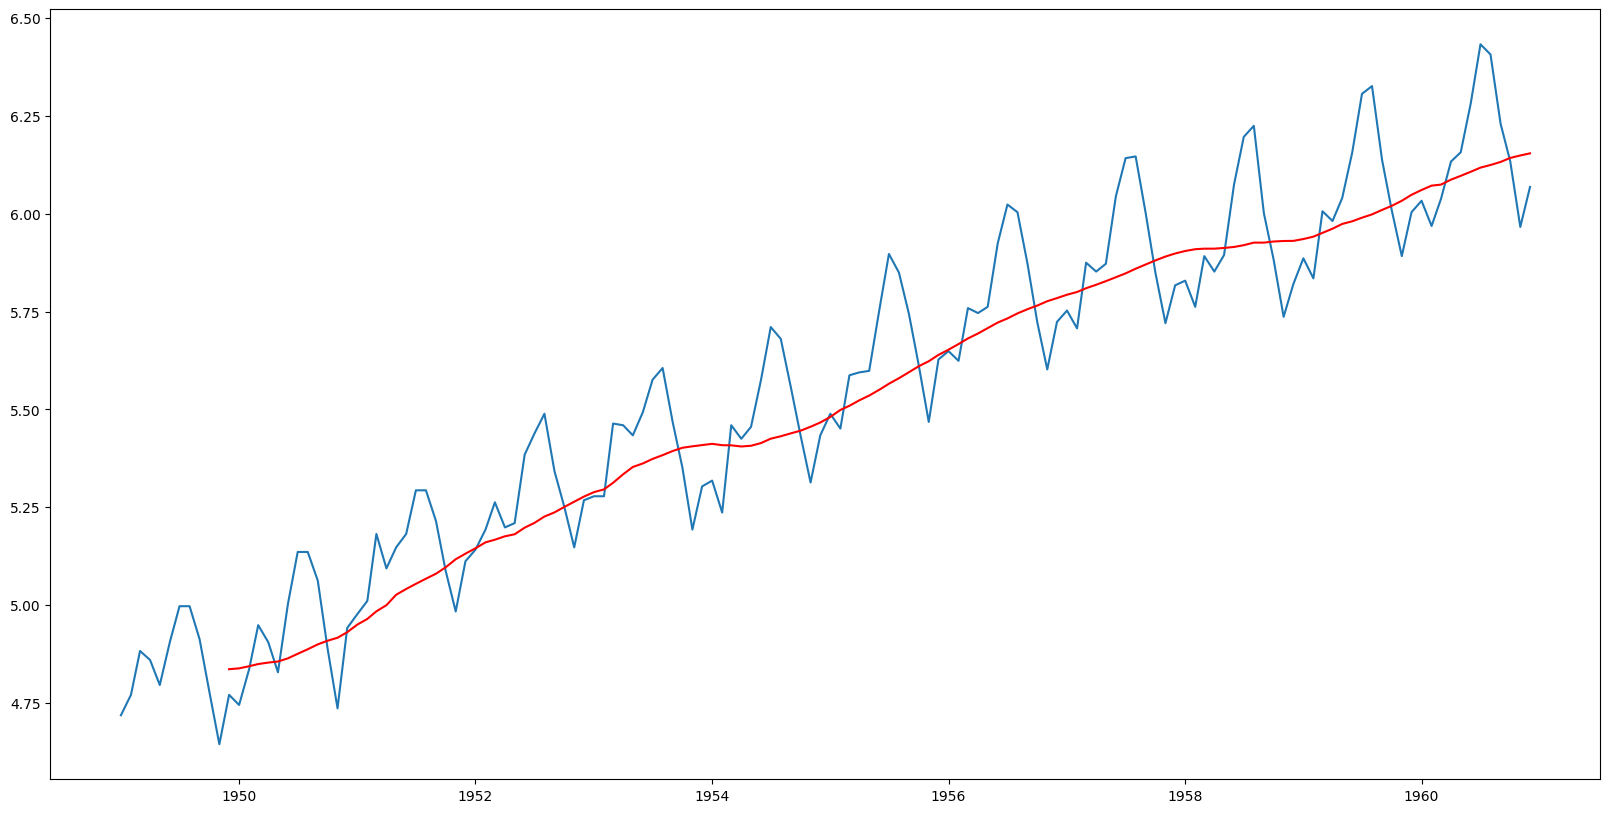

In [ ]:
moving_avg = pd.Series(ts_log).rolling(12).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

###Substract the Moving avg from Time Series

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.tail(12)

Month
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(10)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
Name: #Passengers, dtype: float64

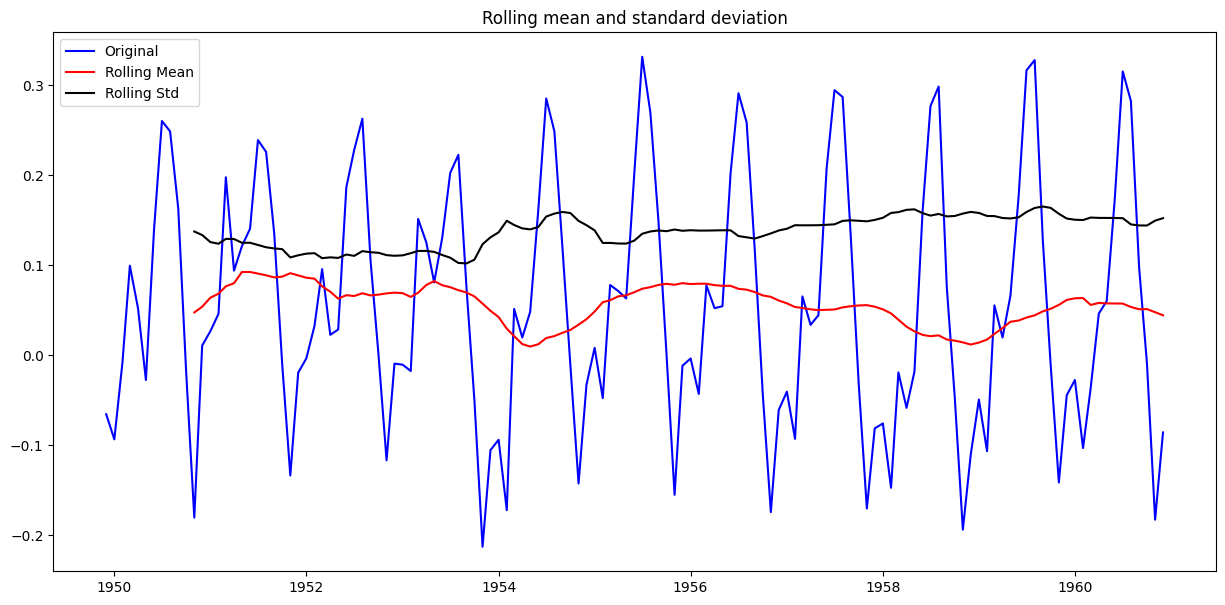

result of dicky-fuller test
Test Statistics                -3.162908
P-value                         0.022235
#Lags used                     13.000000
Number of Observation used    119.000000
critical value(1%)             -3.486535
critical value(5%)             -2.886151
critical value(10%)            -2.579896
dtype: float64


In [ ]:
plt.figure(figsize=(15,7))
test_stationarity(ts_log_moving_avg_diff)

Another method for making stationary time series

###Calculate exponentially **weighted moving average**

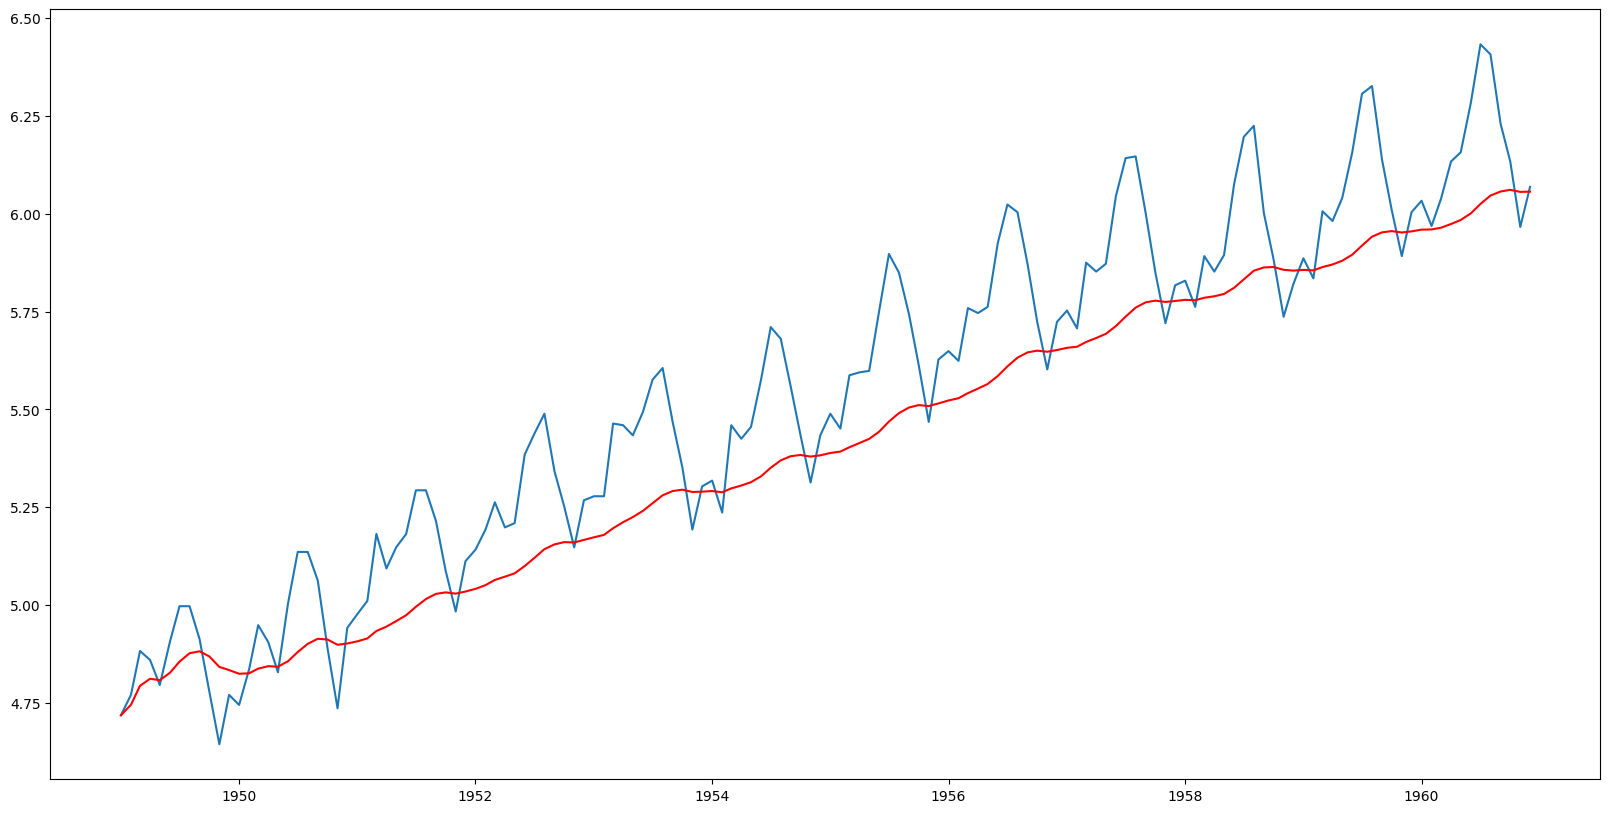

In [ ]:
expweighted_avg = ts_log.ewm(halflife=12).mean()

plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(expweighted_avg,color='red')

###Substract

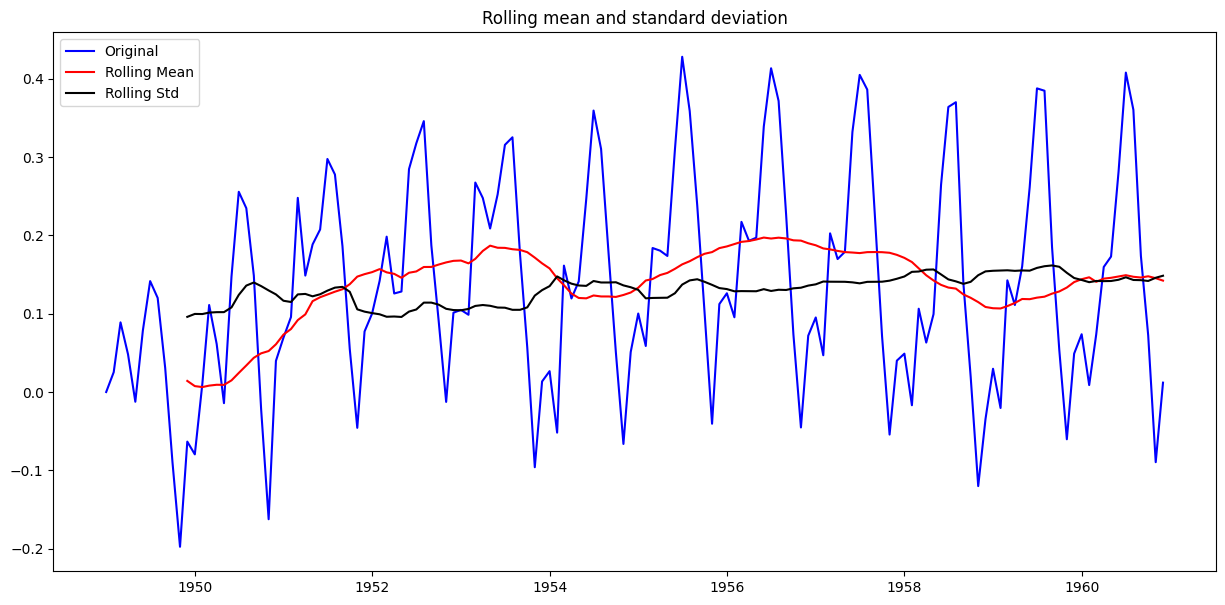

result of dicky-fuller test
Test Statistics                -3.601262
P-value                         0.005737
#Lags used                     13.000000
Number of Observation used    130.000000
critical value(1%)             -3.481682
critical value(5%)             -2.884042
critical value(10%)            -2.578770
dtype: float64


In [ ]:
ts_ewm_diff  = ts_log - expweighted_avg
plt.figure(figsize=(15,7))
test_stationarity(ts_ewm_diff)

###Remove the seosonability

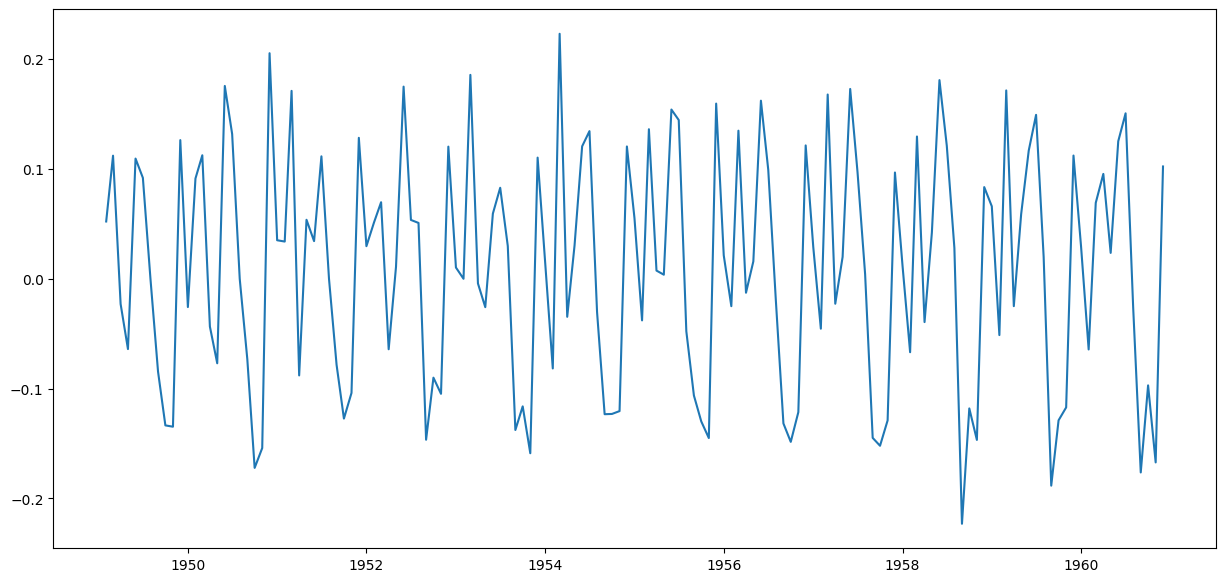

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(15,7))
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.head()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: #Passengers, dtype: float64

In [ ]:
ts_log_diff.dropna(inplace=True)

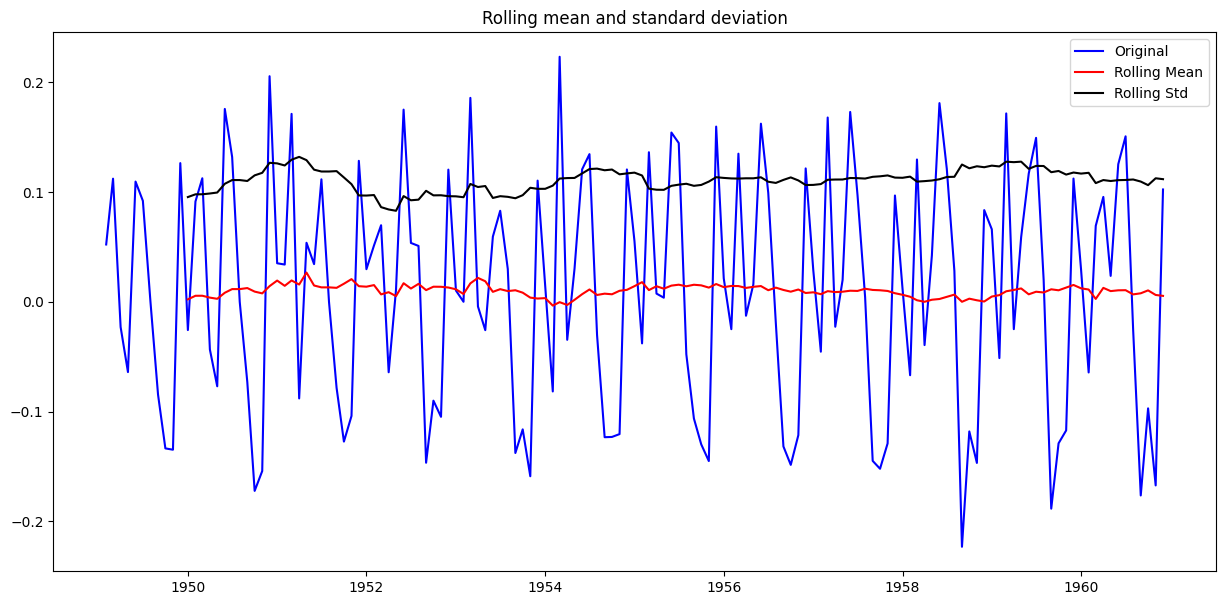

result of dicky-fuller test
Test Statistics                -2.717131
P-value                         0.071121
#Lags used                     14.000000
Number of Observation used    128.000000
critical value(1%)             -3.482501
critical value(5%)             -2.884398
critical value(10%)            -2.578960
dtype: float64


In [ ]:
plt.figure(figsize=(15,7))
test_stationarity(ts_log_diff)

###Forecasting the Time Series

###finding value of p and q

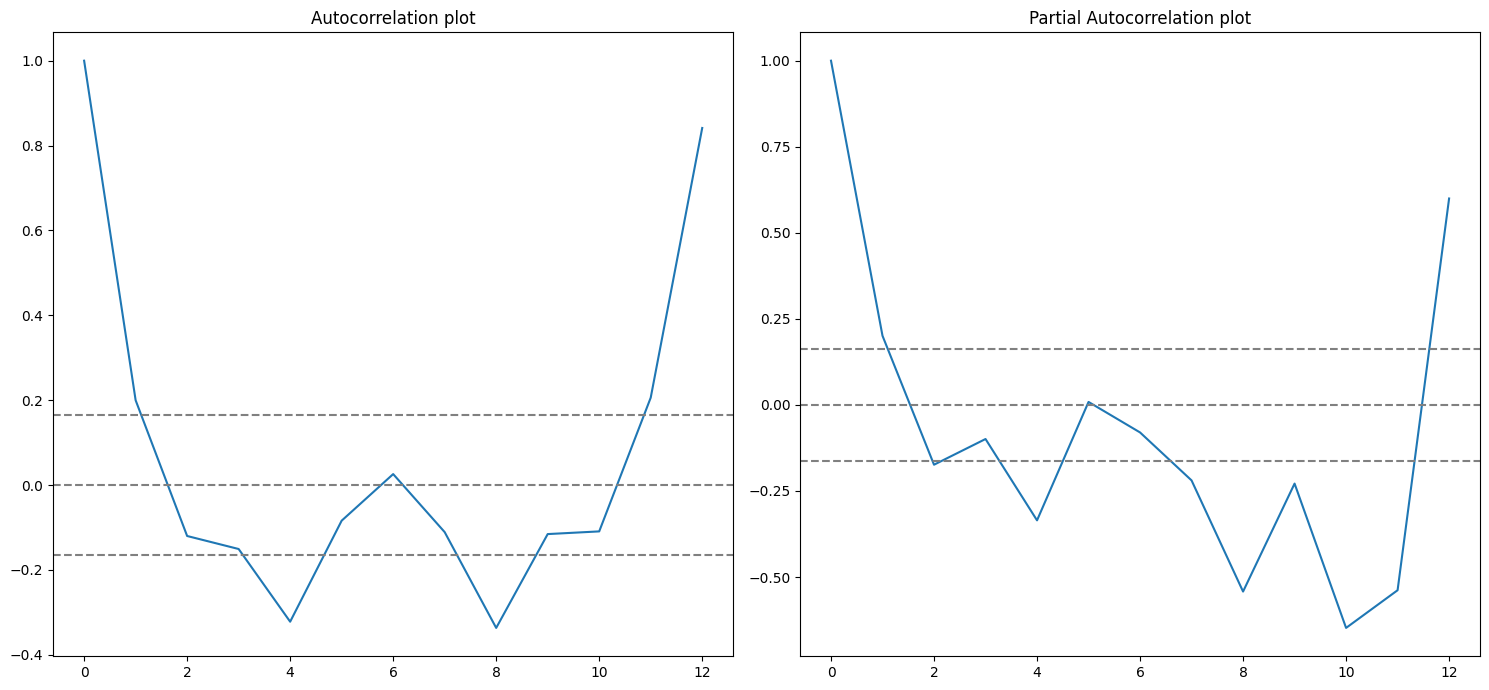

In [ ]:
lag_acf = acf(ts_log_diff,nlags=12)
lag_pacf = pacf(ts_log_diff,nlags=12,method='ols')
plt.figure(figsize=(15,7))

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation plot')

#plot Pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation plot')
plt.tight_layout()

p = pacf = the position where the line fisrt cuts the upper confidence interval from left side . takes p value next highest integer.
**p=2**

q= acf = same as pacf
**q=2**

for d, we shift the time series only one time
 **d = 1**

###fit into the ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.5053')

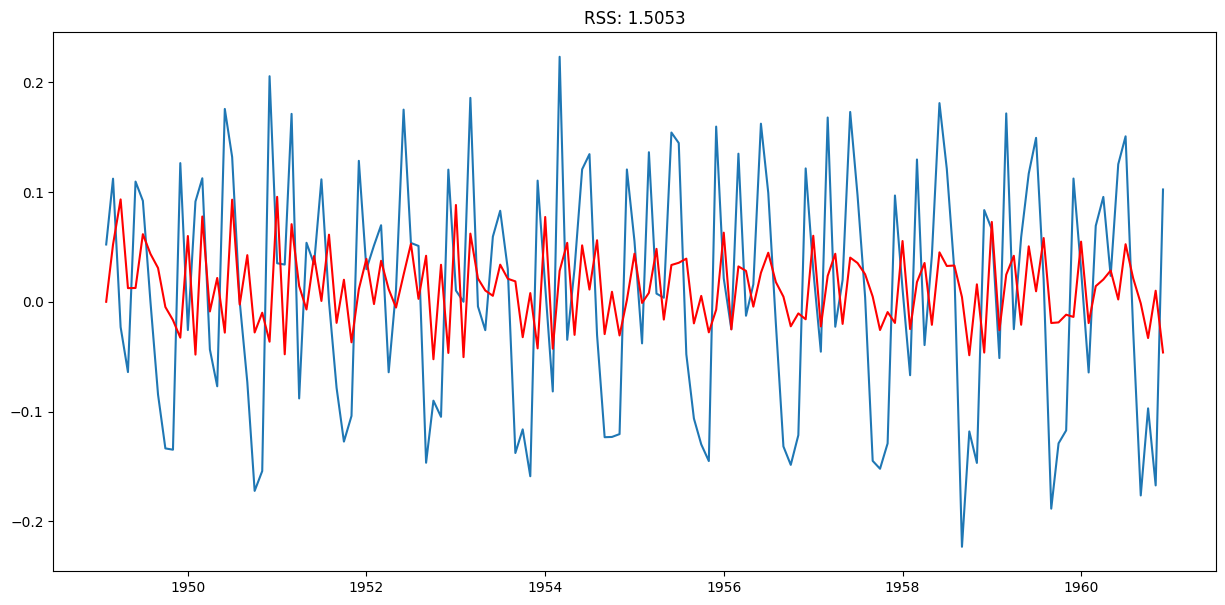

In [ ]:
#ARIMA model
model = ARIMA(ts_log_diff, order=(2,1,2))
results_ARIMA = model.fit()
plt.figure(figsize=(15,7))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

###BRINGING THIS BACK TO THE ORIGINAL SCALE

###First get the predicted values and store it as series

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff = predictions_ARIMA_diff[1:]
print(predictions_ARIMA_diff.head())

Month
1949-03-01    0.052186
1949-04-01    0.093227
1949-05-01    0.012425
1949-06-01    0.012562
1949-07-01    0.061578
dtype: float64


###Now convert differencing to log scale: find the cumulative sum and add it to a new series with a base value

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
print(predictions_ARIMA_log.head())

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.863912
1949-05-01    4.876336
dtype: float64


###Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model.

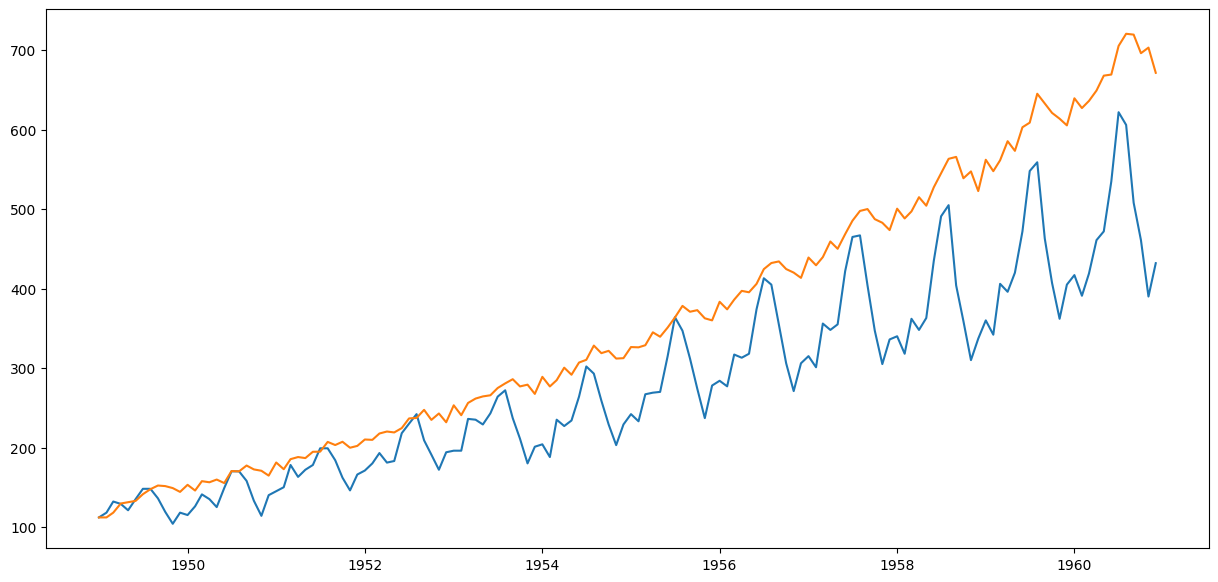

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15,7))
plt.plot(ts)
plt.plot(predictions_ARIMA)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))

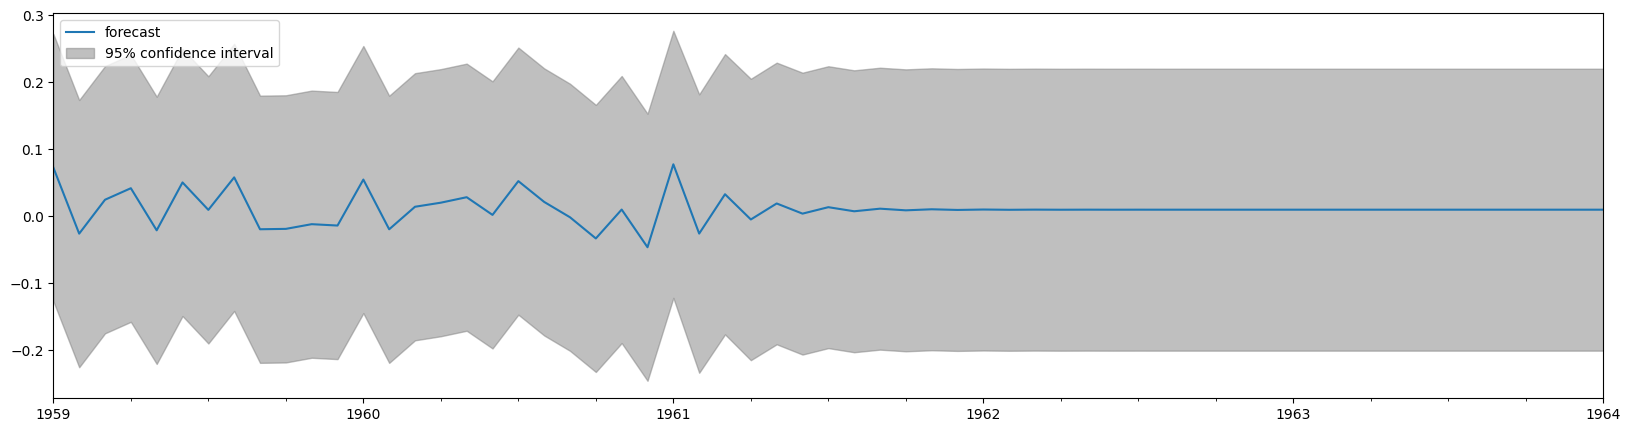

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(20,5))
fig = plot_predict(results_ARIMA,start='1959-01-01', end='1964-01-01',ax=ax)
legend = ax.legend(loc='upper left')
plt.show()